# PMCW Radar

<a href="https://rookiepeng.github.io/radarsimpy/" target="_blank" rel="nofollow"><img src="https://img.shields.io/badge/Documentation-latest-brightgree?style=flat&logo=read-the-docs" height="20" align="left"></a>

<br></br>
This is a phase-modulated continuous-wave (PMCW) radar simulation example based on [`RadarSimPy`](https://github.com/rookiepeng/radarsimpy).

## Radar Model
### Phase code

The phase codes in the transmitter channels are defined with `phs` and `t_mod`. `amp` can also be used if there is an amplitude modulation.

In this example, 2 binary phase code sequences are assigned to 2 different transmitter channels.

In [1]:
import numpy as np

code1 = np.array([1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1,
                  1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1,
                  1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1,
                  -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1,
                  1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1,
                  1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1,
                  1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1,
                  -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1,
                  -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1,
                  1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1,
                  1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1,
                  -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1,
                  -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1,
                  -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1,
                  1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1,
                  1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1])
code2 = np.array([1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1,
                  -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1,
                  -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1,
                  -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1,
                  1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1,
                  -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1,
                  1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1,
                  1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1,
                  -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1,
                  -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1,
                  1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1,
                  1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1,
                  -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1,
                  -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,
                  1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1,
                  -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1])

phase_code1 = np.zeros(np.shape(code1))
phase_code2 = np.zeros(np.shape(code2))
phase_code1[np.where(code1 == 1)] = 0
phase_code1[np.where(code1 == -1)] = 180
phase_code2[np.where(code2 == 1)] = 0
phase_code2[np.where(code2 == -1)] = 180

t_mod1 = np.arange(0, len(phase_code1))*4e-9
t_mod2 = np.arange(0, len(phase_code2))*4e-9

Plot the phase code sequences

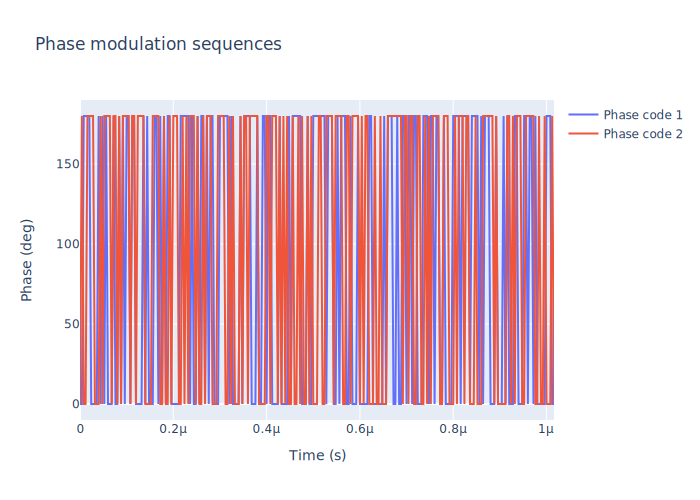

In [2]:
import plotly.graph_objs as go
from IPython.display import SVG, display

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t_mod1,
    y=phase_code1,
    name='Phase code 1',
))
fig.add_trace(go.Scatter(
    x=t_mod2,
    y=phase_code2,
    name='Phase code 2',
))

fig.update_layout(
    title='Phase modulation sequences',
    yaxis=dict(title='Phase (deg)'),
    xaxis=dict(title='Time (s)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

### Transmitter

Setup the basic transmitter parameters through `Transmitter` module.

The following table lists the parameters in this example.

| Parameter                       | Variable in `Transmitter`| Value      |
|---------------------------------|--------------------------|------------|
| Frequency ($f$)                 | `f`                      | 24.125 GHz |
| Time ($T$)                      | `t`                      | 2.1e-6 s   |
| Transmitted power ($P_t$)       | `tx_power`               | 20 dBm     |
| Number of pulses                | `pulses`                 | 256        |

There are 2 transmitter channels assigned with 2 different phase code sequences. The location of these 2 transmitter channels have 1 m offset in x-axis.

In [3]:
from radarsimpy import Radar, Transmitter, Receiver

tx_channel_1 = dict(
    location=(0, 0, 0),
    t_mod=t_mod1,
    phs=phase_code1,
)

tx_channel_2 = dict(
    location=(1, 0, 0),
    t_mod=t_mod2,
    phs=phase_code2,
)

tx = Transmitter(f=24.125e9,
                 t=2.1e-6,
                 tx_power=20,
                 pulses=256,
                 channels=[tx_channel_1, tx_channel_2])

### Receiver

Setup the receiver parameters through `Receiver` module.

The parameters of the receiver are listed in the table below.

| Parameter                        | Variable in `Receiver`   | Value        |
|----------------------------------|--------------------------|--------------|
| Sampling rate ($f_s$)            | `fs`                     | 250 Msps     |
| Noise figure ($NF$)              | `noise_figure`           | 10 dB        |
| RF gain/loss ($G_{rf}$)          | `rf_gain`                | 20 dB        |
| Load resistor ($R_L$)            | `load_resistor`          | 1000 $\Omega$|
| Baseband voltage gain ($G_{BB}$) | `baseband_gain`          | 30 dB        |

In [4]:
rx = Receiver(fs=250e6,
              noise_figure=10,
              rf_gain=20,
              baseband_gain=30,
              load_resistor=1000,
              channels=[
                  dict(location=(0, 0, 0))
              ])

Create the FMCW radar model based on all the parameters defined above.

In [5]:
radar = Radar(transmitter=tx, receiver=rx)

### Targets
The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (degree).

In [6]:
target_1 = dict(location=(20, 0, 0),
                speed=(-200, 0, 0),
                rcs=20,
                phase=0)

target_2 = dict(location=(70, 0, 0),
                speed=(0, 0, 0),
                rcs=35,
                phase=0)

target_3 = dict(location=(33, 10, 0),
                speed=(100, 0, 0),
                rcs=20,
                phase=0)

targets = [target_1, target_2, target_3]

## Simulate Baseband Signals

Use the `simulator` module to simulate the baseband samples. The user can choose between Python engine `simpy` or C++ engine `simc`.

The output baseband data is a 3-D matrix:

$[channels, pulses, ADC~samples]$

In [7]:
# Python engine
from radarsimpy.simulator import simpy
# C++ engine
from radarsimpy.simulator import simc

data = simc(radar, targets)
time_matrix = data['timestamp']
data_matrix = data['baseband']

For convenience, the baseband signal for these 2 transmitter channels are separated. So the total size of the baseband data matrix is $2 \times pulses \times samples$.

The baseband of the 2 transmitter channels are simulated separated. For a realistic case, these 2 transmitter channels should tranmit simutaneously. Thus, the baseband of these 2 channels need to be added together

In [8]:
baseband = data_matrix[0, :, :]+data_matrix[1, :, :]

Plot the baseband samples

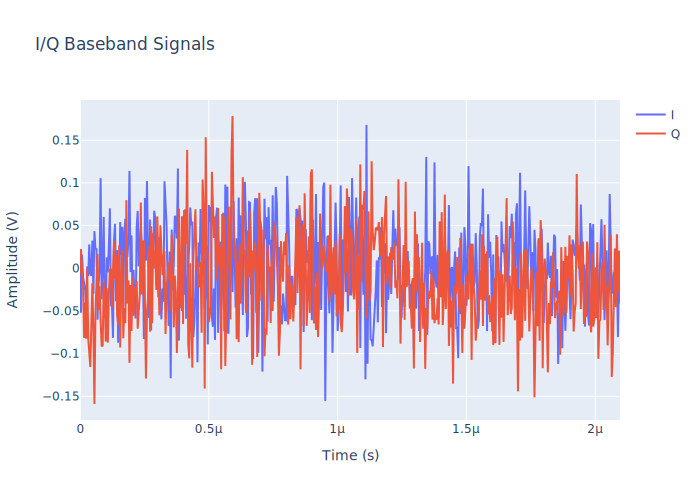

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=time_matrix[0, 0, :],
    y=np.real(baseband[0, :]),
    name='I',
))
fig.add_trace(go.Scatter(
    x=time_matrix[0, 0, :],
    y=np.imag(baseband[0, :]),
    name='Q',
))

fig.update_layout(
    title='I/Q Baseband Signals',
    yaxis=dict(title='Amplitude (V)'),
    xaxis=dict(title='Time (s)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

## Radar Signal Processing

### Demodulate the 2 channels separately

Channel 1

In [10]:
range_profile = np.zeros(
    (radar.channel_size, radar.transmitter.pulses, 255), dtype=complex)

for pulse_idx in range(0, radar.transmitter.pulses):
    for bin_idx in range(0, 255):
        range_profile[0, pulse_idx, bin_idx] = np.sum(
            code1*baseband[pulse_idx, bin_idx:(bin_idx+255)])

Channel 2

In [11]:
for pulse_idx in range(0, radar.transmitter.pulses):
    for bin_idx in range(0, 255):
        range_profile[1, pulse_idx, bin_idx] = np.sum(
            code2*baseband[pulse_idx, bin_idx:(bin_idx+255)])

Plot range profiles

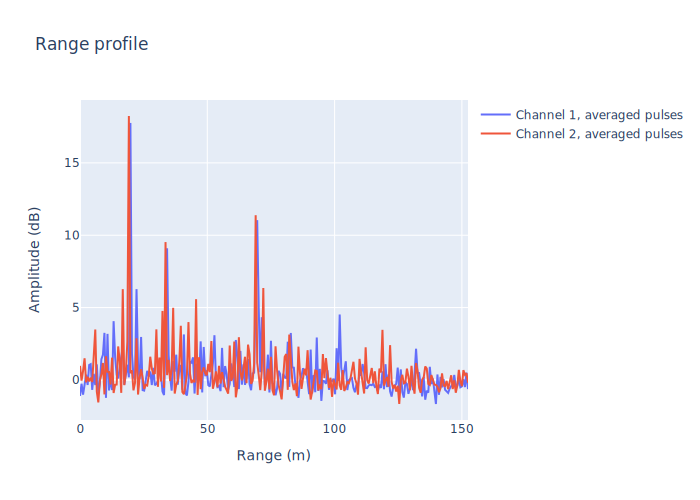

In [12]:
bin_size = 3e8/2*4e-9
range_bin = np.arange(0, 255, 1)*bin_size

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=range_bin,
    y=20 * np.log10(np.mean(np.abs(range_profile[0, :, :]), axis=0)),
    name='Channel 1, averaged pulses',
))
fig.add_trace(go.Scatter(
    x=range_bin,
    y=20 * np.log10(np.mean(np.abs(range_profile[1, :, :]), axis=0)),
    name='Channel 2, averaged pulses',
))

fig.update_layout(
    title='Range profile',
    yaxis=dict(title='Amplitude (dB)'),
    xaxis=dict(title='Range (m)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

### Doppler processing

In [14]:
from scipy import signal

doppler_window = signal.chebwin(radar.transmitter.pulses, at=50)

range_doppler = np.zeros(np.shape(range_profile), dtype=complex)
for ii in range(0, radar.channel_size):
    for jj in range(0, 255):
        range_doppler[ii, :, jj] = np.fft.fftshift(np.fft.fft(
            range_profile[ii, :, jj] * doppler_window,
            n=radar.transmitter.pulses,
        ))
unambiguous_speed = 3e8 / radar.transmitter.prp / \
    radar.transmitter.fc_0 / 2

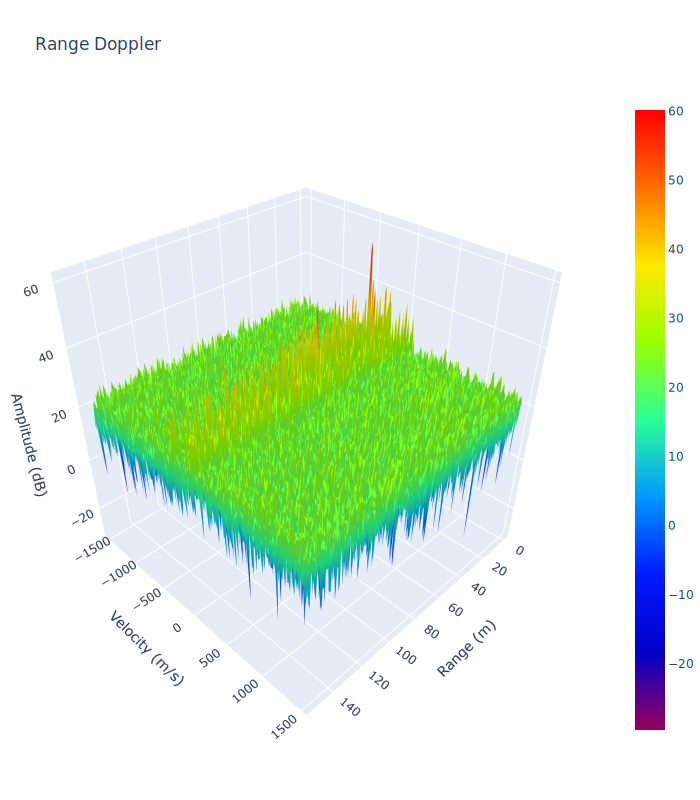

In [15]:
temp = np.abs(range_doppler[1, :, :])
temp = 20 * np.log10(temp)

range_axis = np.arange(0, 255, 1)*bin_size

doppler_axis = np.linspace(
    -unambiguous_speed/2, unambiguous_speed/2, radar.transmitter.pulses, endpoint=False)

data = [go.Surface(x=range_axis, y=doppler_axis, z=temp, colorscale='Rainbow')]

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.4, y=1.4, z=1.4)
)

layout = go.Layout(
    title='Range Doppler',
    height=800,
    scene=dict(
        xaxis=dict(title='Range (m)'),
        yaxis=dict(title='Velocity (m/s)'),
        zaxis=dict(title='Amplitude (dB)'),
        aspectmode='cube',
        camera=camera,
    ),
    margin=dict(l=0, r=0, b=60, t=100),
    legend=dict(orientation='h'),
)

fig = go.Figure(data=data, layout=layout)
# iplot(fig)
display(SVG(fig.to_image(format='svg', scale=1)))